# INFX 574: Problem Set 6
### Prateek Tripathi

## 1) Explore the Data

In [1]:
# import the relevant modules
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import resample

In [2]:
# import the dataset
titanic_df = pd.read_csv("titanic.csv.bz2")

### 1.1) Load the data. Make sure you know the coding of all variables. In particular, you should be aware if a variable is categorical or numeric. Explain the coding scheme if it's not obvious.

In [3]:
# explore the dataset
print(titanic_df.info(), "\n")

print("Description:\n", titanic_df.describe(), "\n")

print("Shape:\n", titanic_df.shape, "\n")

titanic_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB
None 

Description:
             pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
# list the count of observations by different categorical variables
print("Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd):\n\n", titanic_df.groupby('pclass')['pclass'].count(), "\n")

print("Survival (0 = No; 1 = Yes):\n\n", titanic_df.groupby('survived')['survived'].count(), "\n")

print("Sex (female / male):\n\n", titanic_df.groupby('sex')['sex'].count(), "\n")

print("Number of Siblings / Spouses Aboard:\n\n", titanic_df.groupby('sibsp')['sibsp'].count(), "\n")

print("Number of Parents / Children Aboard:\n\n", titanic_df.groupby('parch')['parch'].count(), "\n")

print("Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton):\n\n", 
      titanic_df.groupby('embarked')['embarked'].count(), "\n")

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd):

 pclass
1    323
2    277
3    709
Name: pclass, dtype: int64 

Survival (0 = No; 1 = Yes):

 survived
0    809
1    500
Name: survived, dtype: int64 

Sex (female / male):

 sex
female    466
male      843
Name: sex, dtype: int64 

Number of Siblings / Spouses Aboard:

 sibsp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: sibsp, dtype: int64 

Number of Parents / Children Aboard:

 parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64 

Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton):

 embarked
C    270
Q    123
S    914
Name: embarked, dtype: int64 



Feature Description:

    pclass (categorical):         Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    survival (categorical):       Survival (0 = No; 1 = Yes)
    name (label / name):          Name
    sex (categorical):            Sex
    age (numeric):                Age
    sibsp (categorical):          Number of Siblings/Spouses Aboard
    parch (categorical):          Number of Parents/Children Aboard
    ticket ((label / name)):      Ticket Number
    fare (numeric):               Passenger Fare (British pound)
    cabin:                        Cabin
    embarked (categorical):       Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
    boat (label / name):          Lifeboat
    body (label / name):          Body Identification Number
    home.dest ((label / name)):   Home/Destination

### 1.2) Create such a summary table. You may add more statistics you consider interesting to this table.

In [5]:
# create the summary table

# encode the categorical features
for i in range(len(titanic_df)):
    
    # encode the 'sex' feature as 1 for 'female' and 2 for 'male'
    if titanic_df.loc[i, 'sex'] == 'female':
        titanic_df.loc[i, 'enc_sex'] = 0
    else:
        titanic_df.loc[i, 'enc_sex'] = 1
        
    # encode the 'embarked' feature as 1 for 'C', 2 for 'Q', and 3 for 'S'    
    if titanic_df.loc[i, 'embarked'] == 'C':
        titanic_df.loc[i, 'enc_embarked'] = 1
    elif titanic_df.loc[i, 'embarked'] == 'Q':
        titanic_df.loc[i, 'enc_embarked'] = 2
    elif titanic_df.loc[i, 'embarked'] == 'S':
        titanic_df.loc[i, 'enc_embarked'] = 3

# create the summary dataframe 
titanic_summary = pd.concat(
    [titanic_df.groupby('survived')[['pclass']].mean().transpose(), 
     titanic_df.groupby('survived')[['enc_sex']].mean().transpose(), 
     titanic_df.groupby('survived')[['sibsp']].mean().transpose(), 
     titanic_df.groupby('survived')[['parch']].mean().transpose(), 
     titanic_df.groupby('survived')[['enc_embarked']].mean().transpose()]
)

# rename the columns
titanic_summary.columns = ['drowned', 'survived']

# create the 'missings' column
titanic_summary['missings'] = titanic_df.loc[:, ['pclass', 'enc_sex', 'sibsp', 'parch', 'enc_embarked']].isnull().sum()

# rename the rows
titanic_summary.index = ['pclass (1 = 1st; 2 = 2nd; 3 = 3rd)', 'enc_sex (0 = Female, 1 = Male)', 
                         'sibsp (Number of Siblings/Spouses Aboard: 0-8)', 'parch (Number of Parents/Children Aboard: 0-9)', 
                         'embarked (1 = Cherbourg; 2 = Queenstown; 3 = Southampton)']

# print the summary dataframe
print('Summary Table:\n')
titanic_summary[['survived', 'drowned', 'missings']]

Summary Table:



,survived,drowned,missings
pclass (1 = 1st; 2 = 2nd; 3 = 3rd),1.962000,2.500618,0
"enc_sex (0 = Female, 1 = Male)",0.322000,0.843016,0
sibsp (Number of Siblings/Spouses Aboard: 0-8),0.462000,0.521632,0
parch (Number of Parents/Children Aboard: 0-9),0.476000,0.328801,0
embarked (1 = Cherbourg; 2 = Queenstown; 3 = Southampton),2.309237,2.605686,2


## 2) Implement Decision Tree
### 2.1) Prepare Data
### 2.1.1) Now select the variables you are going to use. Use those that may have influenced survival (such as class), or those that may be otherwise correlated with survival (like fare). Note: do not include explanatory variables that are result of survival/death, namely boat number and body number.
### 2.1.2) Split your data into training/testing groups (80/20% or so).

In [6]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(titanic_df.loc[:, ['pclass', 'enc_sex', 'age', 
                                                                       'sibsp', 'parch', 'enc_embarked', 'fare']], 
                                                    titanic_df.loc[:, 'survived'], test_size = 0.2, random_state = 1)

### 2.2) Implement The Decision Tree
### 2.2.1) Compute the entropy at the root, based of the total number of survivors and victims. You will use this number to compute entropy gain further below.

In [7]:
# compute the entropy at the root
p_survived = sum(y_test) / len(y_test)

root_entropy = - ((p_survived * math.log(p_survived, 2)) + ((1 - p_survived) * math.log((1 - p_survived), 2)))

# print the entropy
print("Entropy (root):", root_entropy)

Entropy (root): 0.9735668399870311


### 2.2.2) Create an ordered vector of unique age values (a1, a2, . . . , ak). These will form the potential split points for age. How many different age values do you find in your training data? Note: remember that there are missing age values!

In [8]:
# concatenate the X_train and y_train
train = pd.concat((X_train, y_train), axis = 1)

# create an ordered vector of unique age values
sorted_age = (sorted(train[train['age'].notnull()]['age'].unique()))

# print the list
print(sorted_age)

[0.1667, 0.3333, 0.4167, 0.6667, 0.75, 0.8333, 0.9167, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 18.5, 19.0, 20.0, 21.0, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 26.5, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 38.5, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 60.5, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 70.0, 70.5, 71.0, 74.0, 76.0, 80.0]


### 2.2.3) Split the (training) data into two groups: (a) age <= a1 and (b) age > a1.

In [9]:
# split the (training) data into two groups
less = train[train['age'] <= sorted_age[0]]

more = train[train['age'] > sorted_age[0]]

### 2.2.4) Compute the entropy of this split.

In [10]:
# compute the entropy of this split
p_survived_less = sum(less['survived']) / len(less['survived'])

p_survived_more = sum(more['survived']) / len(more['survived'])

# to catch for the case where all the observations belong to the same class - - - less
if p_survived_less == 1 or p_survived_less == 0:
    split_entropy_less = 0
else:
    split_entropy_less = - ((p_survived_less * math.log(p_survived_less, 2)) + 
                            ((1 - p_survived_less) * math.log((1 - p_survived_less), 2)))
    
# to catch for the case where all the observations belong to the same class - - - more
if p_survived_more == 1 or p_survived_more == 0:
    split_entropy_more = 0
else:
    split_entropy_more = - ((p_survived_more * math.log(p_survived_more, 2)) + 
                            ((1 - p_survived_more) * math.log((1 - p_survived_more), 2)))
    
# compute and print the entropy
entropy = (((len(less['survived']) / (len(less['survived']) + len(more['survived']))) * split_entropy_less) + 
           ((len(more['survived']) / (len(less['survived']) + len(more['survived']))) * split_entropy_more))

entropy

0.9697751094734886

### 2.2.5) Now repeat these steps with all possible age splits. Find the best age boundary, the split that gives you the lowest entropy.

In [11]:
# define a function to compute the entropy
def entropy(dataframe, feature, target, threshold):
    """This function accepts the dataframe, feature, target and threshold value to compute and return the entropy"""
    
    # split the (training) data into two groups
    less = dataframe[dataframe[feature] <= threshold]

    more = dataframe[dataframe[feature] > threshold]
    
    # compute the proportion
    p_target_less = sum(less[target]) / len(less[target])

    p_target_more = sum(more[target]) / len(more[target])

    # to catch for the case where all the observations belong to the same class - - - less
    if p_target_less == 1 or p_target_less == 0:
        split_entropy_less = 0
    else:
        split_entropy_less = - ((p_target_less * math.log(p_target_less, 2)) + 
                                ((1 - p_target_less) * math.log((1 - p_target_less), 2)))
    
    # to catch for the case where all the observations belong to the same class - - - more
    if p_target_more == 1 or p_target_more == 0:
        split_entropy_more = 0
    else:
        split_entropy_more = - ((p_target_more * math.log(p_target_more, 2)) + 
                                ((1 - p_target_more) * math.log((1 - p_target_more), 2)))
    
    # compute the entropy
    entropy = (((len(less[target]) / (len(less[target]) + len(more[target]))) * split_entropy_less) + 
               ((len(more[target]) / (len(less[target]) + len(more[target]))) * split_entropy_more))
    
    # return statement
    return entropy

# define a function to loop through all the values of the threshold and return the lowest entropy
def lowest_entropy(dataframe, feature, target):
    """This function accepts the dataframe, feature, and target and returns the feature with the lowest entropy"""
    
    # created a sorted list of feature
    sorted_feature = sorted(dataframe[dataframe[feature].notnull()][feature].unique())
    
    entropy_list = {}
    
    # loop through the sorted list to compute the entropy at each item
    for i in range(len(sorted_feature) - 1):
        
        # add (key, value) pair for each item 
        entropy_list[sorted_feature[i]] = (entropy(dataframe, feature, target, sorted_feature[i]))
        
    # return key and value where the value (entropy) is minimum
    return [min(entropy_list, key = entropy_list.get), min(entropy_list.values())]

# find the best age boundary, the split that provides the lowest entropy
print("Best Age Boundary (with the lowest entropy):\n\n", lowest_entropy(train, 'age', 'survived'))

Best Age Boundary (with the lowest entropy):

 [8.0, 0.9561414714311296]


### 2.2.6) Repeat the previous steps over all explanatory variables in your data. For each variable, store (and print) the best split value and the corresponding entropy.

In [12]:
# define a function to loop through all the variables in the dataframe and store 
# (and print) the best split value and the corresponding entropy
def split_decision(dataframe, target, feature_list):
    """This function accepts the dataframe and the target column and returns the dictionary of the
    best feature boundary (with the lowest entropy) for each of the features"""
    
    result = []
    
    # loop through each feature and compute the best split value
    for item in feature_list:
        
        result.append([item] + (lowest_entropy(dataframe, item, target)))
        
    # return statement
    return(np.array(result))
        
# find the best feature boundary for each explanatory variable
features = split_decision(train, 'survived', train.columns[train.columns != 'survived'])

features

array([['pclass', '2', '0.8920434277518692'],
       ['enc_sex', '0.0', '0.7663117834929333'],
       ['age', '8.0', '0.9561414714311296'],
       ['sibsp', '0', '0.9432080891052788'],
       ['parch', '0', '0.9296282502763358'],
       ['enc_embarked', '1.0', '0.92976719524071'],
       ['fare', '15.1', '0.8844206641754055']], dtype='<U18')

### 2.2.7) Now pick the feature that gives the largest entropy gain. This gives you the first split (tree stump). Show the name of the feature, the resulting entropy, and the split position. Print the survived/non-survived percentage in both branches.

In [13]:
# feature that gives the largest entropy gain
best_split = features[features[:, 2] == min(features[:, 2])]

left_branch = round((sum(train[train[best_split[0][0]] <= float(best_split[0][1])]['survived']) / 
                     len(train[train[best_split[0][0]] <= float(best_split[0][1])]['survived'])) * 100, 2)

right_branch = round((sum(train[train[best_split[0][0]] > float(best_split[0][1])]['survived']) / 
                      len(train[train[best_split[0][0]] > float(best_split[0][1])]['survived'])) * 100, 2)

print(" Name of the Feature:\t\t", best_split[0][0], "\n", 
      "Resulting Entropy:\t\t", best_split[0][2], "\n", 
      "Split Position:\t\t", best_split[0][1], "\n",
      "Survived (%) - Left Branch:\t", left_branch, "\n",
      "Survived (%) - Right Branch:\t", right_branch)

 Name of the Feature:		 enc_sex 
 Resulting Entropy:		 0.7663117834929333 
 Split Position:		 0.0 
 Survived (%) - Left Branch:	 70.89 
 Survived (%) - Right Branch:	 19.38


### 2.2.8) Create such a recursive function we discussed in the class that takes in data and returns a tree.

In [14]:
# define a recursive function that takes in the data and returns a tree
def growTree(dataframe, target, feature_list, leaf_size = 5):
    """This function accepts dataframe, target and feature list and returns a decision tree"""
    
    # check if the unique values for a feature are less than two 
    for item in feature_list:
        
        if (len(dataframe[dataframe[item].notnull()][item].unique()) < 2):
            
            # remove feature if true
            feature_list = feature_list.drop(item)
    
    # control statement to see if we have sufficient conditions to split the tree further
    if(len(dataframe['survived']) >= leaf_size and 
       sum(dataframe['survived']) != 0 and
       sum(dataframe['survived']) != len(dataframe['survived']) and
       len(feature_list) > 0):
        
        # perform the entropy gain analysis
        features = split_decision(dataframe, target, feature_list)
    
        # feature that gives the largest entropy gain
        best_split = features[features[:, 2] == min(features[:, 2])]
        
        # split the data as per the best feature boundary
        left_branch = dataframe[dataframe[best_split[0][0]] <= float(best_split[0][1])]
        right_branch = dataframe[dataframe[best_split[0][0]] > float(best_split[0][1])]
        
        # compute the percentage survived for each branch
        left = round((sum(left_branch['survived']) / len(left_branch['survived'])) * 100, 2)
        right = round((sum(right_branch['survived']) / len(right_branch['survived'])) * 100, 2)
        
        # return statement
        return[best_split[0][0], best_split[0][1], 
               growTree(left_branch, target, feature_list, leaf_size), 
               growTree(right_branch, target, feature_list, leaf_size)]
    
    # if the sufficient condition is not met
    else:
        
        # return the percentage survived
        return[sum(dataframe['survived']) / len(dataframe)]
    
# test the 'tree' function
titanic_decision_tree = growTree(train, 'survived', train.columns[train.columns != 'survived'])

titanic_decision_tree

['enc_sex',
 '0.0',
 ['pclass',
  '2',
  ['fare',
   '26.0',
   ['age',
    '55.0',
    ['age',
     '44.0',
     ['age',
      '42.0',
      ['age',
       '17.0',
       [1.0],
       ['age',
        '38.0',
        ['age',
         '36.0',
         ['age',
          '30.0',
          ['enc_embarked',
           '2.0',
           [1.0],
           ['sibsp',
            '1',
            ['fare',
             '12.65',
             [1.0],
             ['fare',
              '21.0',
              ['sibsp',
               '0',
               ['age', '21.0', [1.0], ['age', '22.0', [0.0], [0.75]]],
               [0.0]],
              ['age',
               '25.0',
               [1.0],
               ['age', '26.0', [0.0], ['age', '28.0', [1.0], [0.75]]]]]],
            [1.0]]],
          [1.0]],
         [0.0]],
        [1.0]]],
      [0.0]],
     [1.0]],
    [0.0]],
   ['fare',
    '146.5208',
    ['fare', '31.6792', ['fare', '30.0708', [1.0], [0.0]], [1.0]],
    ['fare', '151.55', [0.33

### 2.2.9) Visualize the two top levels of branches of your tree. Try to make the result readable (I don't ask anything like fancy graphical results) but ensuring that one decision is on a single line, and adding a little manual indentation will make a large step toward making the tree readable. 
### Comment the outcome. Does it make sense? Which variables seem to be more important?

In [15]:
# visualize the two top levels of branches of your tree
print("\nTop Two Levels of the Decision Tree: Titanic\n")

print("Root:\t\t\t\t\t ", titanic_decision_tree[0], "<=", titanic_decision_tree[1])

print("\t\t\t\t\t/\t\t \\")

print("Level One:\t\t    ", titanic_decision_tree[2][0], "<=", titanic_decision_tree[2][1], "\t\t ", 
      titanic_decision_tree[3][0], "<=", titanic_decision_tree[3][1])

print("\t\t\t\t/    \\\t\t\t      /    \\")

print("Level Two:\t    ", titanic_decision_tree[2][2][0], "<=", titanic_decision_tree[2][2][1], 
      " ", titanic_decision_tree[2][3][0], "<=", titanic_decision_tree[2][3][1],
      " ", titanic_decision_tree[3][2][0], "<=", titanic_decision_tree[3][2][1],
      "  ", titanic_decision_tree[3][3][0], "<=", titanic_decision_tree[3][3][1])


Top Two Levels of the Decision Tree: Titanic

Root:					  enc_sex <= 0.0
					/		 \
Level One:		     pclass <= 2 		  fare <= 26.25
				/    \			      /    \
Level Two:	     fare <= 26.0   fare <= 23.25   age <= 14.0    sibsp <= 2


It appears that the most important feature is 'sex' followed by 'fare' and 'pclass'.

Yes, it does make sense as we have observed that the average of 'sex' for those who 'survived' indicates that most of them were female or 0.0. This is reflected in our decision tree as well, with the first decision boundary drawn on the basis of the 'sex'.

### 2.2.10) Predict (based on training data) using your tree. Compute accuracy, precision and recall. Note: you have to create a function that walks through the nested list based on a single observation. As the decisions differ between individual observations, we cannot easily vectorize the operation. A set of loops is necessary (can be done in parallel).

In [16]:
# create a function to compute the accuracy, precision, and recall for the decision tree 
def tree_performance(features, target, tree):
    """This function accepts the features and the target, computes the accuracy, precision and recall"""
    
    # create a list for prediction
    prediction = []
    
    # loop through each of the feature
    for item in features.index:
        
        # create a copy of the decision tree to walk through
        decision_walk = tree[:]
        
        # loop till we reach a leaf
        while(len(decision_walk) != 1):
            
            # decide the branch
            if(features.loc[item, decision_walk[0]] <= float(decision_walk[1])):
        
                decision_walk = decision_walk[2]
        
            else:
        
                decision_walk = decision_walk[3]
            
        # when we reach a leaf
        if(len(decision_walk) == 1):
            
            prediction.append(0 if decision_walk[0] <= 0.5 else 1)
                
    # return the accuracy, precision, and recall scores        
    return {"Prediction": np.array(prediction), 
            "Accuracy Score": accuracy_score(target, prediction), 
            "Precision Score": precision_score(target, prediction), 
            "Recall Score": recall_score(target, prediction)}

# calculate the accuracy, precision, and recall scores
print(tree_performance(X_test, y_test, titanic_decision_tree))

{'Prediction': array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 'Accuracy Score': 0.767175572519084, 'Precision Score': 0.7227722772277227, 'Recall Score': 0.6886792452830188}


## 3) Bagging and Random Forests
### 3.1) Bagging
### 3.1.1) Create a small number B of bagging trees (B = 5 is a good choice). Note: as your tree algorithm may be slow, use this to measure and boost the speed. Suggestions to improve the speed are 
### a) use fewer features (but keep age, class, sex); 
### b) use a larger minimum number of observations for splits (say, 100); and 
### c) run your tree-growing code in parallel.
### 3.1.2) Predict (on test data) the survival according to each individual tree.

In [17]:
# define a function to create n number of bagging trees and compute their individual performance
def bagging(test_features, test_target, train, n, leaf_size = 5):

    # create small number B of bagging trees (B = 5)
    b = n

    # create a list of bagging trees
    tree_list = []
    tree_performance_list = []

    # loop to create five bagging trees
    for i in range(b):
    
        # resample
        resampled_dataset = resample(train, random_state = (i + 1))
    
        # create the decision tree on the resampled data
        decision_tree = growTree(resampled_dataset, 'survived', 
                                 resampled_dataset.columns[resampled_dataset.columns != 'survived'], leaf_size)
    
        # append to the list of trees
        tree_list.append(decision_tree)
    
        # append to the list of tree performance
        tree_performance_list.append(tree_performance(X_test, y_test, decision_tree))
        
    return tree_performance_list
    
# compute the tree performance
tree_performance_list = bagging(X_test, y_test, train, 5)

print(tree_performance_list)

[{'Prediction': array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]), 'Accuracy Score': 0.7404580152671756, 'Precision Score': 0.6938775510204082, 'Recall Score': 0.6415094339622641}

### 3.1.3) Show some aggregate statistics: in how many cases all trees agree?

In [18]:
# create a dataframe of the predictions from each tree
bagging_prediction = pd.DataFrame({'prediction_one': tree_performance_list[0]['Prediction'], 
                                   'prediction_two': tree_performance_list[1]['Prediction'], 
                                   'prediction_three': tree_performance_list[2]['Prediction'], 
                                   'prediction_four': tree_performance_list[3]['Prediction'], 
                                   'prediction_five': tree_performance_list[4]['Prediction']})

# sum over all the prediction for each observation
bagging_prediction['sum'] = (bagging_prediction['prediction_one'] + bagging_prediction['prediction_two'] + 
                             bagging_prediction['prediction_three'] + bagging_prediction['prediction_four'] + 
                             bagging_prediction['prediction_five'])

# cases of agreement for all the five predictions
print("Cases of agreement for all the five bagging trees:", 
      sum(np.logical_or(bagging_prediction['sum'] == 0, bagging_prediction['sum'] == 5)))

Cases of agreement for all the five bagging trees: 143


### 3.1.4) Find your final prediction: the majority vote over all trees. Compute accuracy, precision, recall. Did you get better results than in case of the single tree?

In [19]:
# compute the final prediction based on the majority vote
bagging_prediction['final_prediction'] = [1 if value else 0 for value in bagging_prediction['sum'] >= 3]

print("Accuracy Score:", accuracy_score(y_test, bagging_prediction['final_prediction']))
print("Precision Score:", precision_score(y_test, bagging_prediction['final_prediction']))
print("Recall Score:", recall_score(y_test, bagging_prediction['final_prediction']))

Accuracy Score: 0.7900763358778626
Precision Score: 0.7865168539325843
Recall Score: 0.660377358490566


Yes, I get better results for model performance in the case of bagging trees than in the case of the single tree.

### 3.1.5) Repeat the process above with a large range of B, say, between 1 and 300. (Hint: you don't have to test every single number between 1 and 300. Choose numbers that make this not too slow on your computer.) For each B, compute accuracy, precision, recall.
### 3.1.6) Show on a figure how A, P, R depend on the B.
### 3.1.7) Discuss your findings. What is the optimal bag size B?

In [20]:
# define a function to compute the accuracy, precision, and recall for predictions using multiple trees
def performance(tree_performance, target):
    
    # initialize the majority vote array
    majority_vote = np.zeros_like(tree_performance[0]['Prediction'])
    
    # add the predictions for each iteration to the majority vote
    for element in tree_performance:
        
        majority_vote += element['Prediction']
    
    # compute the final prediction
    final_prediction = [1 if value else 0 for value in majority_vote >= (len(tree_performance) / 2)]
    
    # return the dictionary with the performance metrics
    return [len(tree_performance), accuracy_score(target, final_prediction), 
            precision_score(target, final_prediction), recall_score(target, final_prediction)]   

In [21]:
# create an empty list to store the performance metrics
figure_values_bagging = []

# loop through the range of 1 to 301 in steps of 25 to compute the precision, accuracy and recall
for i in [1, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300]:
    
    # compute and append into the performance metrics
    figure_values_bagging.append(performance(bagging(X_test, y_test, train, i, leaf_size = 100), y_test))

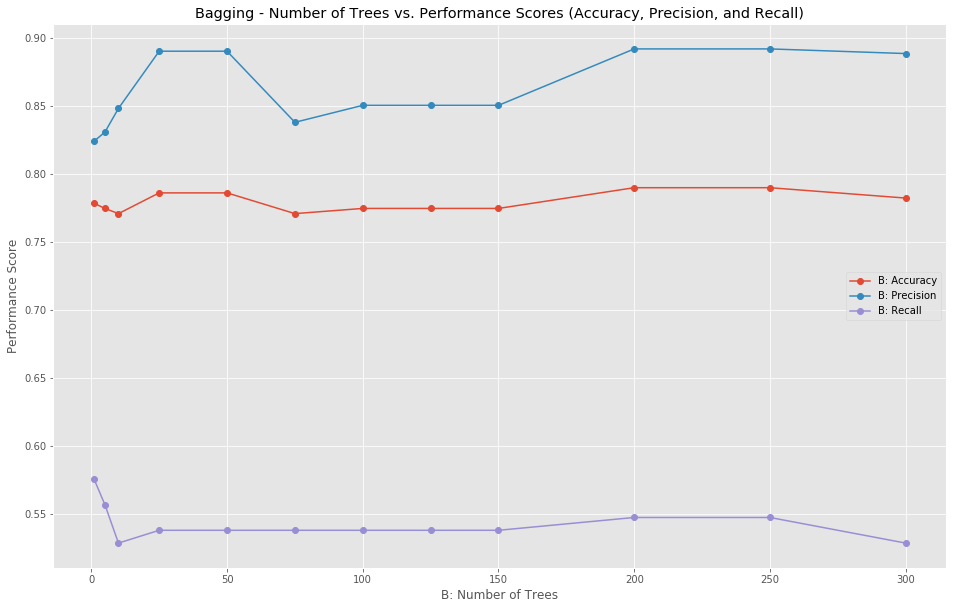

In [22]:
# create a dataframe of the bagging performance
bagging_df = pd.DataFrame(figure_values_bagging)

# create the display
plt.style.use('ggplot')
plt.figure(figsize = (16, 10))
plt.plot(bagging_df[0], bagging_df[1], marker = 'o', label = 'B: Accuracy')
plt.plot(bagging_df[0], bagging_df[2], marker = 'o', label = 'B: Precision')
plt.plot(bagging_df[0], bagging_df[3], marker = 'o', label = "B: Recall")
plt.title('Bagging - Number of Trees vs. Performance Scores (Accuracy, Precision, and Recall)')
plt.xlabel('B: Number of Trees')
plt.ylabel('Performance Score')
plt.legend()
plt.show()

It appears that the optimal bag size is ~ 200 as the performance metrics (accuracy, precision, and recall) do not vary in a significant manner (settles down) after this point and we get the best accuracy, precision, and recall. 

### 3.2) Random Forests
### 3.2.1) Implement random tree algorithm by changing your previous growTree algorithm. We refer the new version as growForestTree. Note: depending on how you implemented the data structures and the prediction algorithm, you may have to adjust the prediction function too.

In [23]:
# set the seed
np.random.seed(1)

# define a recursive function that takes in the data and returns a tree for the random forest
def growForestTree(dataframe, target, feature_list, leaf_size = 5):
    """This function accepts dataframe, target and feature list and returns a decision tree for the random forest"""
    
    # check if the unique values for a feature are less than two 
    for item in feature_list:
        
        if (len(dataframe[dataframe[item].notnull()][item].unique()) < 2):
            
            # remove feature if true
            feature_list = feature_list.drop(item)
    
    # control statement to see if we have sufficient conditions to split the tree further
    if(len(dataframe['survived']) >= leaf_size and 
       sum(dataframe['survived']) != 0 and
       sum(dataframe['survived']) != len(dataframe['survived']) and
       len(feature_list) > 0):
        
        # perform the entropy gain analysis
        features = split_decision(dataframe, target, 
                                  np.random.choice(feature_list, round(math.sqrt(len(feature_list))), replace = False))
    
        # feature that gives the largest entropy gain
        best_split = features[features[:, 2] == min(features[:, 2])]
        
        # split the data as per the best feature boundary
        left_branch = dataframe[dataframe[best_split[0][0]] <= float(best_split[0][1])]
        right_branch = dataframe[dataframe[best_split[0][0]] > float(best_split[0][1])]
        
        # compute the percentage survived for each branch
        left = round((sum(left_branch['survived']) / len(left_branch['survived'])) * 100, 2)
        right = round((sum(right_branch['survived']) / len(right_branch['survived'])) * 100, 2)
        
        # return statement
        return[best_split[0][0], best_split[0][1], 
               growForestTree(left_branch, target, feature_list, leaf_size), 
               growForestTree(right_branch, target, feature_list, leaf_size)]
    
    # if the sufficient condition is not met
    else:
        
        # return the percentage survived
        return[sum(dataframe['survived']) / len(dataframe)]

### 3.2.2) Create random forests of different size B. Ideally you want to go up to B = 1000, but you may need to keep the number much smaller in order to finish in a reasonable time. For each B, compute accuracy, precision, recall.
### 3.2.3) Show on a figure how A, P, R depend on the B. Include the bagging outcomes on the same figure too.
### 3.2.4) Discuss your findings. What is the optimal forest size? Are random forests superior to bagging?

In [24]:
# define a function to create n number of bagging trees and compute their individual performance
def randomForest(test_features, test_target, train, n, leaf_size = 5):

    # create small number B of bagging trees (B = 5)
    b = n

    # create a list of bagging trees
    tree_list = []
    tree_performance_list = []

    # loop to create five bagging trees
    for i in range(b):
    
        # resample
        resampled_dataset = resample(train, random_state = (i + 1))
    
        # create the decision tree on the resampled data
        decision_tree = growForestTree(resampled_dataset, 'survived', 
                                       resampled_dataset.columns[resampled_dataset.columns != 'survived'], leaf_size)
    
        # append to the list of trees
        tree_list.append(decision_tree)
    
        # append to the list of tree performance
        tree_performance_list.append(tree_performance(X_test, y_test, decision_tree))
        
    return tree_performance_list

In [25]:
# create an empty list to store the performance metrics
figure_values = []

# loop through the range of 1 to 301 in steps of 25 to compute the precision, accuracy and recall
for i in [1, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300]:
    
    # compute and append into the performance metrics
    figure_values.append(performance(randomForest(X_test, y_test, train, i, leaf_size = 100), y_test))

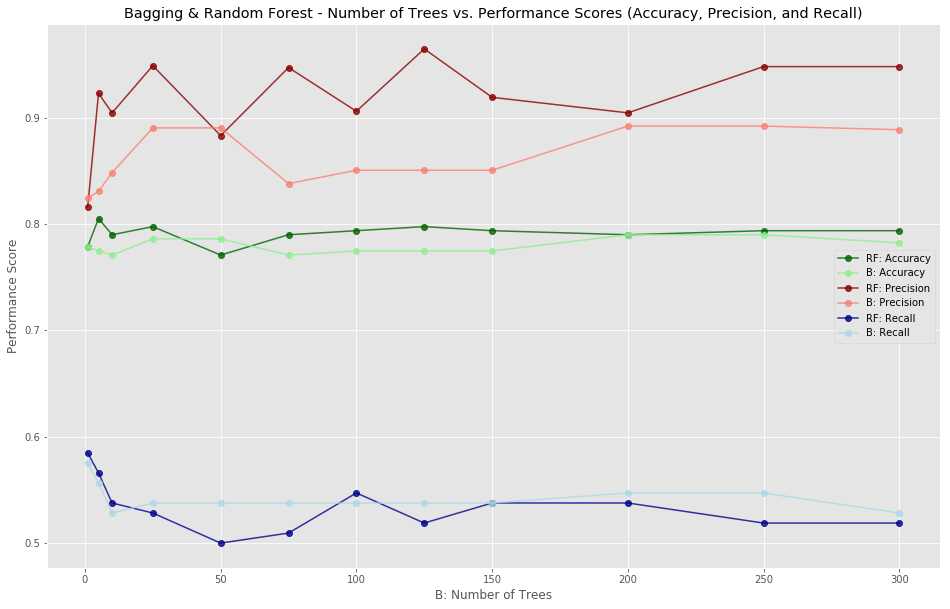

In [26]:
# create a dataframe of the bagging performance
randomForest_df = pd.DataFrame(figure_values)

# create the display
plt.figure(figsize = (16, 10))
plt.plot(randomForest_df[0], randomForest_df[1], marker = 'o', label = 'RF: Accuracy', color = 'darkgreen', alpha = 0.8)
plt.plot(bagging_df[0], bagging_df[1], marker = 'o', label = 'B: Accuracy', color = 'lightgreen', alpha = 0.8)

plt.plot(randomForest_df[0], randomForest_df[2], marker = 'o', label = 'RF: Precision', color = 'darkred', alpha = 0.8)
plt.plot(bagging_df[0], bagging_df[2], marker = 'o', label = 'B: Precision', color = 'salmon', alpha = 0.8)

plt.plot(randomForest_df[0], randomForest_df[3], marker = 'o', label = "RF: Recall", color = 'darkblue', alpha = 0.8)
plt.plot(bagging_df[0], bagging_df[3], marker = 'o', label = "B: Recall", color = 'lightblue', alpha = 0.8)

plt.title('Bagging & Random Forest - Number of Trees vs. Performance Scores (Accuracy, Precision, and Recall)')
plt.xlabel('B: Number of Trees')
plt.ylabel('Performance Score')
plt.legend()
plt.show()

It appears that the optimal random forest is at ~ (125 - 200) as the performance metrics (accuracy, precision, and recall) do not vary in a significant manner (settles down) after this point and we get the best accuracy, precision, and recall.

Yes, random forests are superior to bagging as per the observed accuracy, precision, and recall (as we decorrelate the trees).